# Aufgabe 10 SMD

Eine korrelierte 2D Gauß Verteilung hat die Form:
$$ f(x,y)=\frac{1}{2\pi\sigma_x\sigma_y(1-\rho^2)} e^{\frac{-1}{2(1-\rho^2)}\left(\left(\frac{x-\mu_x}{\sigma_x}\right)^2+\left(\frac{y-\mu_y}{\sigma_y}\right)^2-2\rho\frac{x-\mu_x}{\sigma_x}\frac{y-\mu_y}{\sigma_y}\right)}$$
bzw.
$$f(u_x,u_y)=\lambda e^{-\gamma(u_x^2-2\rho u_xu_y+u_y^2)}$$
$$ g(u_x) = \int_{-\infty}^\infty f(x,y) \text{d}\!y=\frac{\lambda}{\sqrt{\gamma}}\sigma_y\sqrt{\pi} e^{-u_x^2(\gamma-\gamma\rho^2)}$$
Es gilt nach der Formel für bedingte Wahrscheinlichkeiten:
$$f(u_y|u_x)=\frac{f(u_x,u_y)}{g(u_x)}=\frac{1}{\sqrt{\gamma}}\sigma_y\sqrt{\pi}e^{-\gamma((\rho u_x)^2-2\rho u_xu_y+u_y^2)}$$
Für $u_x=\frac{\overline{x}}{\sigma_x}=\frac{x-\mu_x}{\sigma_x}$, $u_y=\frac{\overline{y}}{\sigma_y}=\frac{y-\mu_y}{\sigma_y}$ und $\gamma=\frac{1}{2(1-\rho^2)}$ stimmt dies mit der Formel aus der Aufgabenstellung überein.
Für die Korrelation $\rho'$ gilt dabei $\rho'=\sqrt{\frac{\alpha}{1+\alpha^2}}$ mit $\alpha=b\frac{\sigma_x}{\sigma_{y|x}}$.
Außerdem gilt:
$$E(y|x)=bx+a=\frac{\rho'\sigma_y'}{\sigma_x'}(x-\mu_x')+\mu_y'$$
Durch Koeffizientenvergleich ergibt sich:
$$\sigma_y'=b\frac{\sigma_x'}{\rho'}$$
und
$$\mu_y'=a+\rho'\frac{\sigma_y'}{\sigma_x'}\mu_x'$$

### Aufgabenteil b)

Anmerkung: Da ich nicht auf dem Schirm hatte, dass ich dazu  vorgefertigte Funtionen nutzen kann, habe ich die Werte nach den jeweiligen Verteilungsfunktionen duch den Metropolis-Algorithmus mit einer gleichverteilten Schritt-PDF und einer Schrittweite von 1 erstellt. Dadurch konnte ich leider keinen Randomseed setzen.

In [121]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.constants as const

0.6230329489303637
3.370608253713267
3.1000000000000005


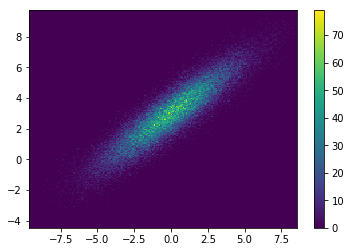

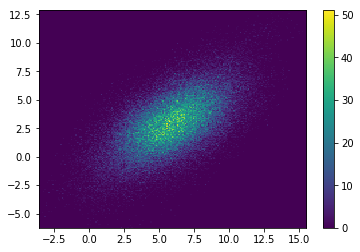

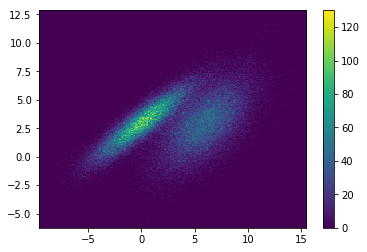

In [122]:
sx0=3.5
sy0=2.6
ux0=0
uy0=3
rho0=0.9

a=-0.5
b=0.6
ux=6
sx=3.5
syx=1
alpha=b*sx/syx
rho=(alpha/(1+alpha**2))**0.5
sy=b*sx/rho
uy=a+rho*sy*ux/sx
print(rho)
print(sy)
print(uy)

def p0(x,y):
    return 1/(2*const.pi*sx0*sy0*
              (1-rho0**2))*np.exp((-1/(1-rho0**2))*
                                  (((x-ux0)/sx0)**2+((y-uy0)/sy0)**2-
                                   2*rho0*((y-uy0)/sy0)*((x-ux0)/sx0)))
def p1(x,y):
    return 1/(2*const.pi*sx*sy*
              (1-rho**2))*np.exp((-1/(1-rho**2))*
                                 (((x-ux)/sx)**2+((y-uy)/sy)**2-
                                  2*rho*((y-uy)/sy)*((x-ux)/sx)))

def Metro0(s,x0,number):
    w=[x0]
    time = [0]
    for i in range(1,number):
        y=w[i-1]+np.random.uniform(-s,s,2)
        if min(1,p0(y[0],y[1])/p0(w[i-1][0],w[i-1][1])) < np.random.uniform(0,1):
            w.append(w[i-1])
        else:
            w.append(y)
        time.append(i)
    return time,w

time0, w0 = Metro0(1,(0,3),100000)

def Metro1(s,x0,number):
    w=[x0]
    time = [0]
    for i in range(1,number):
        y=w[i-1]+np.random.uniform(-s,s,2)
        if min(1,p1(y[0],y[1])/p1(w[i-1][0],w[i-1][1])) < np.random.uniform(0,1):
            w.append(w[i-1])
        else:
            w.append(y)
        time.append(i)
    return time,w

time1, w1 = Metro1(1,(ux,uy),100000)

x0=[]
y0=[]
x1=[]
y1=[]

for i in time0:
    x0.append(w0[i][0])
    y0.append(w0[i][1])
    

for i in time1:
    x1.append(w1[i][0])
    y1.append(w1[i][1])
    
#plt.scatter(x0,y0,s=5,alpha=0.002)
#plt.show()
plt.hist2d(
    x0,
    y0,
    bins=[200, 200]
)
plt.colorbar()
plt.show()
plt.hist2d(
    x1,
    y1,
    bins=[200, 200]
)
plt.colorbar()
plt.show()

yg = y0+y1
xg = x0+x1
plt.hist2d(
    xg,
    yg,
    bins=[200, 200]
)
plt.colorbar()
plt.show()


Jetzt nochmal die Scatterplots:

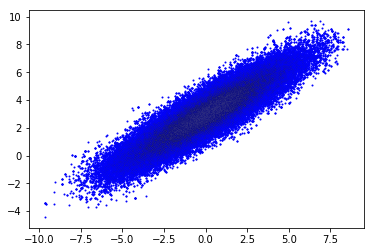

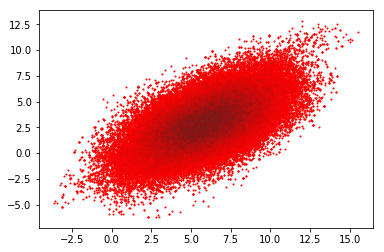

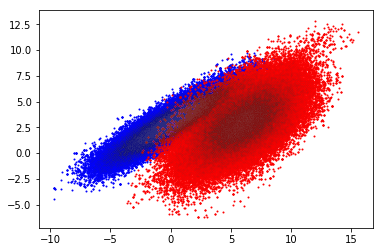

In [123]:
plt.scatter(x0,y0,s=1,c='b')
plt.scatter(x0,y0,s=1,c='grey',alpha=0.01)
plt.show()
plt.scatter(x1,y1,s=1,c='r')
plt.scatter(x1,y1,s=1,c='grey',alpha=0.01)
plt.show()
plt.scatter(x0,y0,s=1,c='b')
plt.scatter(x1,y1,s=1,c='r')
plt.scatter(x0,y0,s=1,c='grey',alpha=0.01)
plt.scatter(x1,y1,s=1,c='grey',alpha=0.01)
plt.show()

### Aufgabenteil c)
Zunächst werden 100 Stichprobenwerte genommen und davon Mittelwerte und Standardabweichungen berechnet.

In [124]:
stichx0=[]
stichy0=[]
for i in range(0,int(len(w0)/1000)):
    stichx0.append(x0[i*1000])
    stichy0.append(y0[i*1000])
print('ux0 = ', np.mean(stichx0),'pm',np.std(stichx0))
print('uy0 = ', np.mean(stichy0),'pm',np.std(stichy0))
stichx1=[]
stichy1=[]
for i in range(0,int(len(w1)/1000)):
    stichx1.append(x1[i*1000])
    stichy1.append(y1[i*1000])
print('ux1 = ', np.mean(stichx1),'pm',np.std(stichx1))
print('uy1 = ', np.mean(stichy1),'pm',np.std(stichy1))
print('uxg = ', np.mean(stichx1+stichx0),'pm',np.std(stichx1+stichx0))
print('uyg = ', np.mean(stichy1+stichy0),'pm',np.std(stichy1+stichy0))
ux0=np.mean(stichx0)
fx0=np.std(stichx0)
uy0=np.mean(stichy0)
fy0=np.std(stichy0)
ux1=np.mean(stichx1)
fx1=np.std(stichx1)
uy1=np.mean(stichy1)
fy1=np.std(stichy1)
uxg=np.mean(stichx0+stichx1)
fxg=np.std(stichx0+stichx1)
uyg=np.mean(stichy0+stichy1)
fyg=np.std(stichy0+stichy1)

ux0 =  0.300612092253 pm 2.53149972262
uy0 =  3.18588017737 pm 1.7094465998
ux1 =  5.75649556789 pm 2.57610731023
uy1 =  2.94038010778 pm 2.22216167034
uxg =  3.02855383007 pm 3.73685375478
uyg =  3.06313014257 pm 1.98624586957


Es ergeben sich (für einen der Durchläufe)
\begin{align*}
\mu_{x,P0}&=-0.32&\sigma_{x,P0}&=2.31\\
\mu_{y,P0}&=2.80&\sigma_{y,P0}&=1.76\\
\mu_{x,P1}&=6.06&\sigma_{x,P1}&=2.45\\
\mu_{y,P1}&=3.53&\sigma_{y,P1}&=2.24\\
\mu_{x,Pges}&=2.87&\sigma_{x,Pges}&=3.98\\
\mu_{y,Pges}&=3.16&\sigma_{y,Pges}&=2.05
\end{align*}

Anhand dieser Daten werden Covarianzmatrizen und Korrelationsfaktoren bestimmt

In [125]:
c00 = []
c10 = []
c11 = []
for i in range(0,int(len(w0)/1000)-1):
    c00.append((stichx0[i]-ux0)*(stichx0[i]-ux0))
    c10.append((stichx0[i]-ux0)*(stichy0[i]-uy0))
    c11.append((stichy0[i]-uy0)*(stichy0[i]-uy0))

c0=[[np.mean(c00),np.mean(c10)],[np.mean(c10),np.mean(c11)]]
print('c0=',c0)

c00 = []
c10 = []
c11 = []
for i in range(0,int(len(w1)/1000)-1):
    c00.append((stichx1[i]-ux)*(stichx1[i]-ux))
    c10.append((stichx1[i]-ux)*(stichy1[i]-uy))
    c11.append((stichy1[i]-uy)*(stichy1[i]-uy))

c1=[[np.mean(c00),np.mean(c10)],[np.mean(c10),np.mean(c11)]]
print('c1=',c1)

c00 = []
c10 = []
c11 = []
stichxg=stichx0+stichx1
stichyg=stichy0+stichy1
for i in range(0,int(len(w1)/1000)-1):
    c00.append((stichxg[i]-uxg)*(stichxg[i]-uxg))
    c10.append((stichxg[i]-uxg)*(stichyg[i]-uyg))
    c11.append((stichyg[i]-uyg)*(stichyg[i]-uyg))

cg=[[np.mean(c00),np.mean(c10)],[np.mean(c10),np.mean(c11)]]
print('cg=',cg)
print('rho0=', c0[0][1]/(fx0*fy0))
print('rho1=', c1[0][1]/(fx1*fy1))
print('rhog=', cg[0][1]/(fxg*fyg))

c0= [[6.4165308551807838, 3.8697936133701121], [3.8697936133701121, 2.9461589349715687]]
c1= [[6.7467607582629343, 3.8694539124500316], [3.8694539124500316, 5.009070051432583]]
cg= [[13.727637255464046, 3.517421592474657], [3.517421592474657, 2.9630673005061303]]
rho0= 0.894240593825
rho1= 0.675943001784
rhog= 0.473898480852


Für einen Durchlauf ergeben sich
\begin{align*}
    cov_{P0}&=
    \begin{pmatrix}
    5.35&3.59\\3.59&3.08
    \end{pmatrix}&
    \rho_{P0}&=0.89\\
    cov_{P1}&=
    \begin{pmatrix}
    5.99&3.83\\3.83&5.21
    \end{pmatrix}&
    \rho_{P1}&=0.7\\
    cov_{Pges}&=
    \begin{pmatrix}
    15.54&4.76\\4.76&3.21
    \end{pmatrix}&
    \rho_{Pges}&=0.58
\end{align*}
Es ist zu beachten, dass aufgrund der Nutzung des Metropolis Algorithmus zur Erstellung der Werte kein Random-Seed gesetzt werden konnte, sodass die Werte in den Markdowns lediglich ähnlich zu den direkten Python Ausgaben sind.

### Aufgabenteil d)

Zunächst wir die letzte Popultion $P_{0,\text{klein}}$erzeugt:

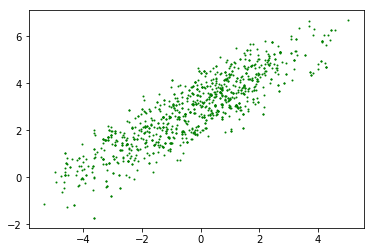

In [129]:
sx0=3.5
sy0=2.6
ux0=0
uy0=3
rho0=0.9

time0k, w0k = Metro0(1,(0,3),1000)
x0k=[]
y0k=[]

for i in time0k:
    x0k.append(w0k[i][0])
    y0k.append(w0k[i][1])
plt.scatter(x0k,y0k,s=1,c='g')
plt.show()

Dann werden die Verteilungen mithilfe von Pandas abgespeichert

In [127]:
import pandas as pd
signal0 = pd.DataFrame({
    'x': x0,
    'y': y0,
})
signal1 = pd.DataFrame({
    'x': x1,
    'y': y1,
})
signal0k = pd.DataFrame({
    'x': x0k,
    'y': y0k,
})
signal0.to_hdf('data.hdf5', key='p0')
signal1.to_hdf('data.hdf5', key='p1')
signal0k.to_hdf('data.hdf5', key='p0k')

Hier habe ich das auslesen probiert

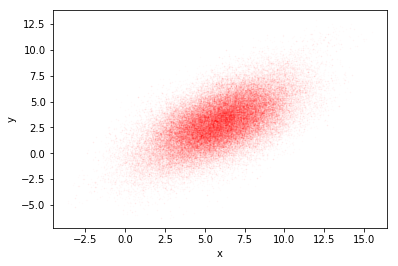

In [128]:
probe = pd.read_hdf('data.hdf5', key='p1')
probe.plot.scatter('x','y',s=1,c='r',alpha=0.01)
plt.show()